# Clustering

## Importing Needed packages

In [111]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import scipy.cluster.hierarchy

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster import hierarchy 
from sklearn.cluster import AgglomerativeClustering 

%matplotlib inline

## Load Data From CSV File

In [62]:
df = pd.read_csv("Customer.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data Exploration

In [63]:
# summarize the data
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Data pre-processing

In [64]:
gender = {"Gender":{'Female': 1,'Male': 0}}
df.replace(gender , inplace = True)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


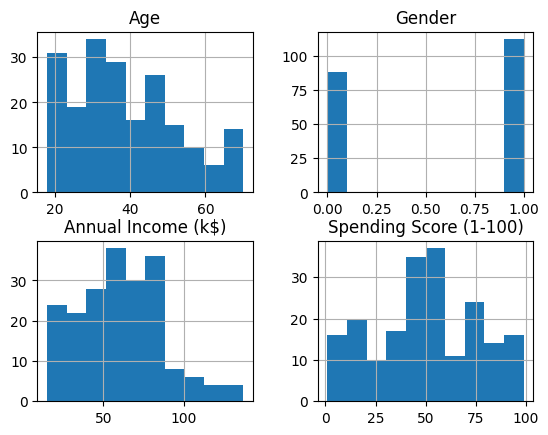

In [77]:
cdf = df[['Age','Gender','Annual Income (k$)','Spending Score (1-100)']]
viz = cdf
viz.hist()
plt.show()

Now, let's plot each of these features against the Annual Income (k$), to see how linear their relationship is:

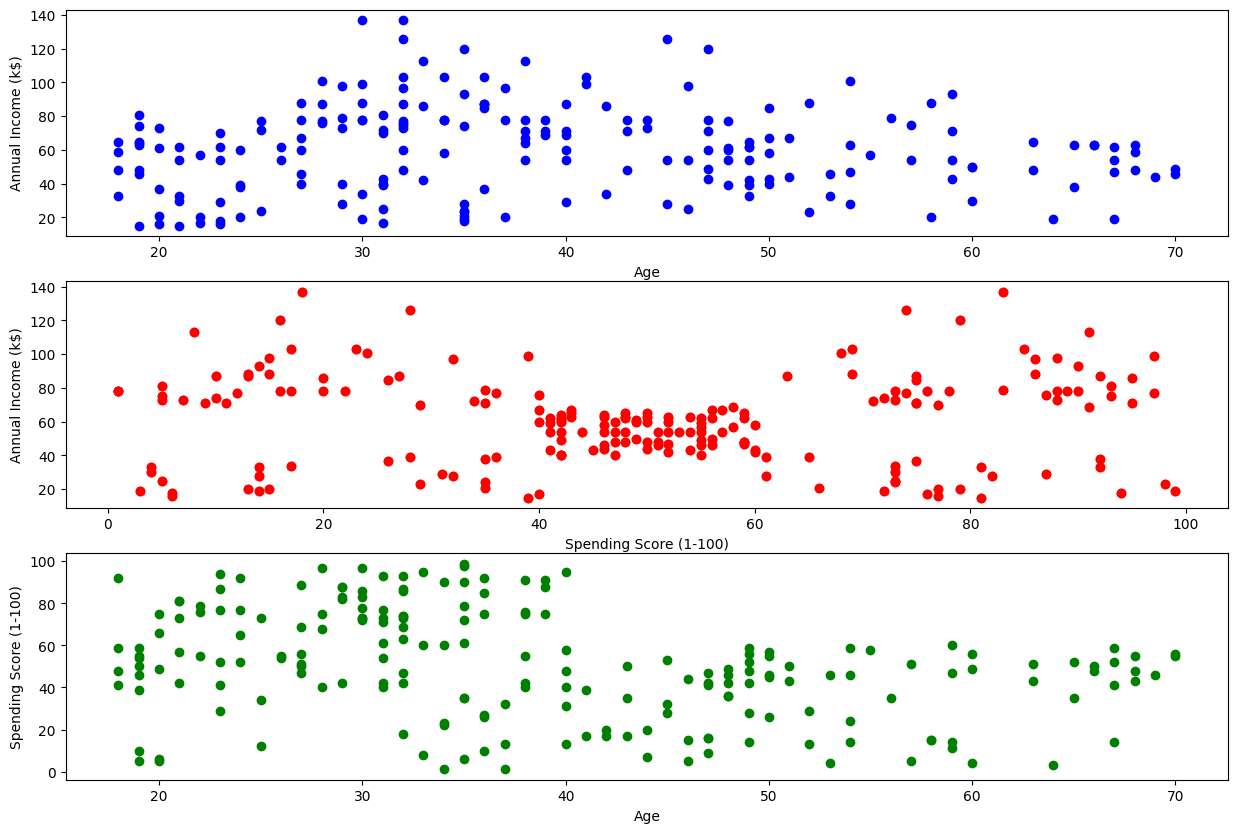

In [78]:
fig, axs = plt.subplots(3,1,figsize=(15,10), sharey='row')
ax1,ax2, ax3 = axs

ax1.scatter(cdf.Age, cdf['Annual Income (k$)'],  color='blue')
ax1.set_xlabel("Age")
ax1.set_ylabel("Annual Income (k$)")

ax2.scatter(cdf['Spending Score (1-100)'], cdf['Annual Income (k$)'],  color='red')
ax2.set_xlabel("Spending Score (1-100)")
ax2.set_ylabel("Annual Income (k$)")

ax2.scatter(cdf['Spending Score (1-100)'], cdf['Annual Income (k$)'],  color='red')
ax2.set_xlabel("Spending Score (1-100)")
ax2.set_ylabel("Annual Income (k$)")

ax3.scatter(cdf.Age, cdf['Spending Score (1-100)'],  color='green')
ax3.set_xlabel("Age")
ax3.set_ylabel("Spending Score (1-100)")

plt.show()


## Customer Segmentation with K-Means

### Normalizing over the standard deviation

In [79]:
X = df.values
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-1.7234121 , -1.12815215, -1.42456879, -1.73899919, -0.43480148,
         1.28170603],
       [-1.70609137, -1.12815215, -1.28103541, -1.73899919,  1.19570407,
         1.28170603],
       [-1.68877065,  0.88640526, -1.3528021 , -1.70082976, -1.71591298,
         1.28170603],
       ...,
       [ 1.68877065, -1.12815215, -0.49160182,  2.49780745,  0.92395314,
         0.04929639],
       [ 1.70609137, -1.12815215, -0.49160182,  2.91767117, -1.25005425,
         0.04929639],
       [ 1.7234121 , -1.12815215, -0.6351352 ,  2.91767117,  1.27334719,
         0.04929639]])

## Modeling

In [80]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


## Insights

In [81]:
df["Clus_km"] = labels
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clus_km
0,1,0,19,15,39,2
1,2,0,21,15,81,2
2,3,1,20,16,6,2
3,4,1,23,16,77,2
4,5,1,31,17,40,2


In [82]:
df.groupby('Clus_km').mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Clus_km,,,,,
0,96.985915,0.535211,43.197183,59.352113,50.591549
1,166.500000,0.544118,36.044118,88.911765,50.205882
2,31.016393,0.606557,36.918033,30.360656,49.737705


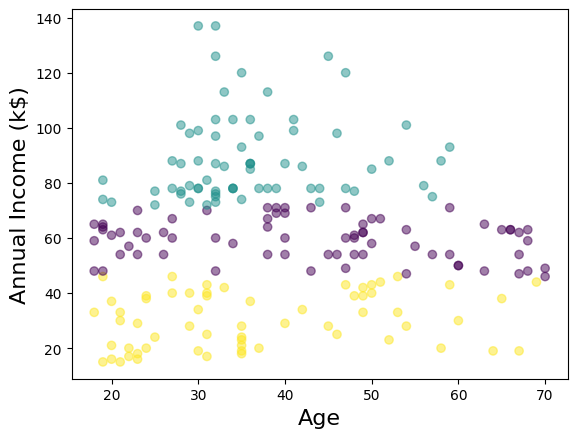

In [89]:
plt.scatter(X[:, 2], X[:, 3], c = labels, alpha = 0.5)
plt.xlabel('Age', fontsize = 16)
plt.ylabel('Annual Income (k$)', fontsize = 16)
plt.show()

# Customer Segmentation with Hierarchical

In [94]:
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(X)
feature_mtx [0:5]

array([[0.        , 0.        , 0.01923077, 0.        , 0.3877551 ,
        1.        ],
       [0.00502513, 0.        , 0.05769231, 0.        , 0.81632653,
        1.        ],
       [0.01005025, 1.        , 0.03846154, 0.00819672, 0.05102041,
        1.        ],
       [0.01507538, 1.        , 0.09615385, 0.00819672, 0.7755102 ,
        1.        ],
       [0.0201005 , 1.        , 0.25      , 0.01639344, 0.39795918,
        1.        ]])

In [96]:
dist_matrix = euclidean_distances(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.43032315 1.055428   ... 1.49928423 1.53244686 1.57997823]
 [0.43032315 0.         1.25942674 ... 1.4483538  1.63951649 1.50676711]
 [1.055428   1.25942674 0.         ... 1.88623356 1.80886662 1.96672404]
 ...
 [1.49928423 1.4483538  1.88623356 ... 0.         0.57852001 0.13469899]
 [1.53244686 1.63951649 1.80886662 ... 0.57852001 0.         0.66439853]
 [1.57997823 1.50676711 1.96672404 ... 0.13469899 0.66439853 0.        ]]


In [102]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

C:\Users\B_Ameri\AppData\Local\Temp\ipykernel_10568\1633147189.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')


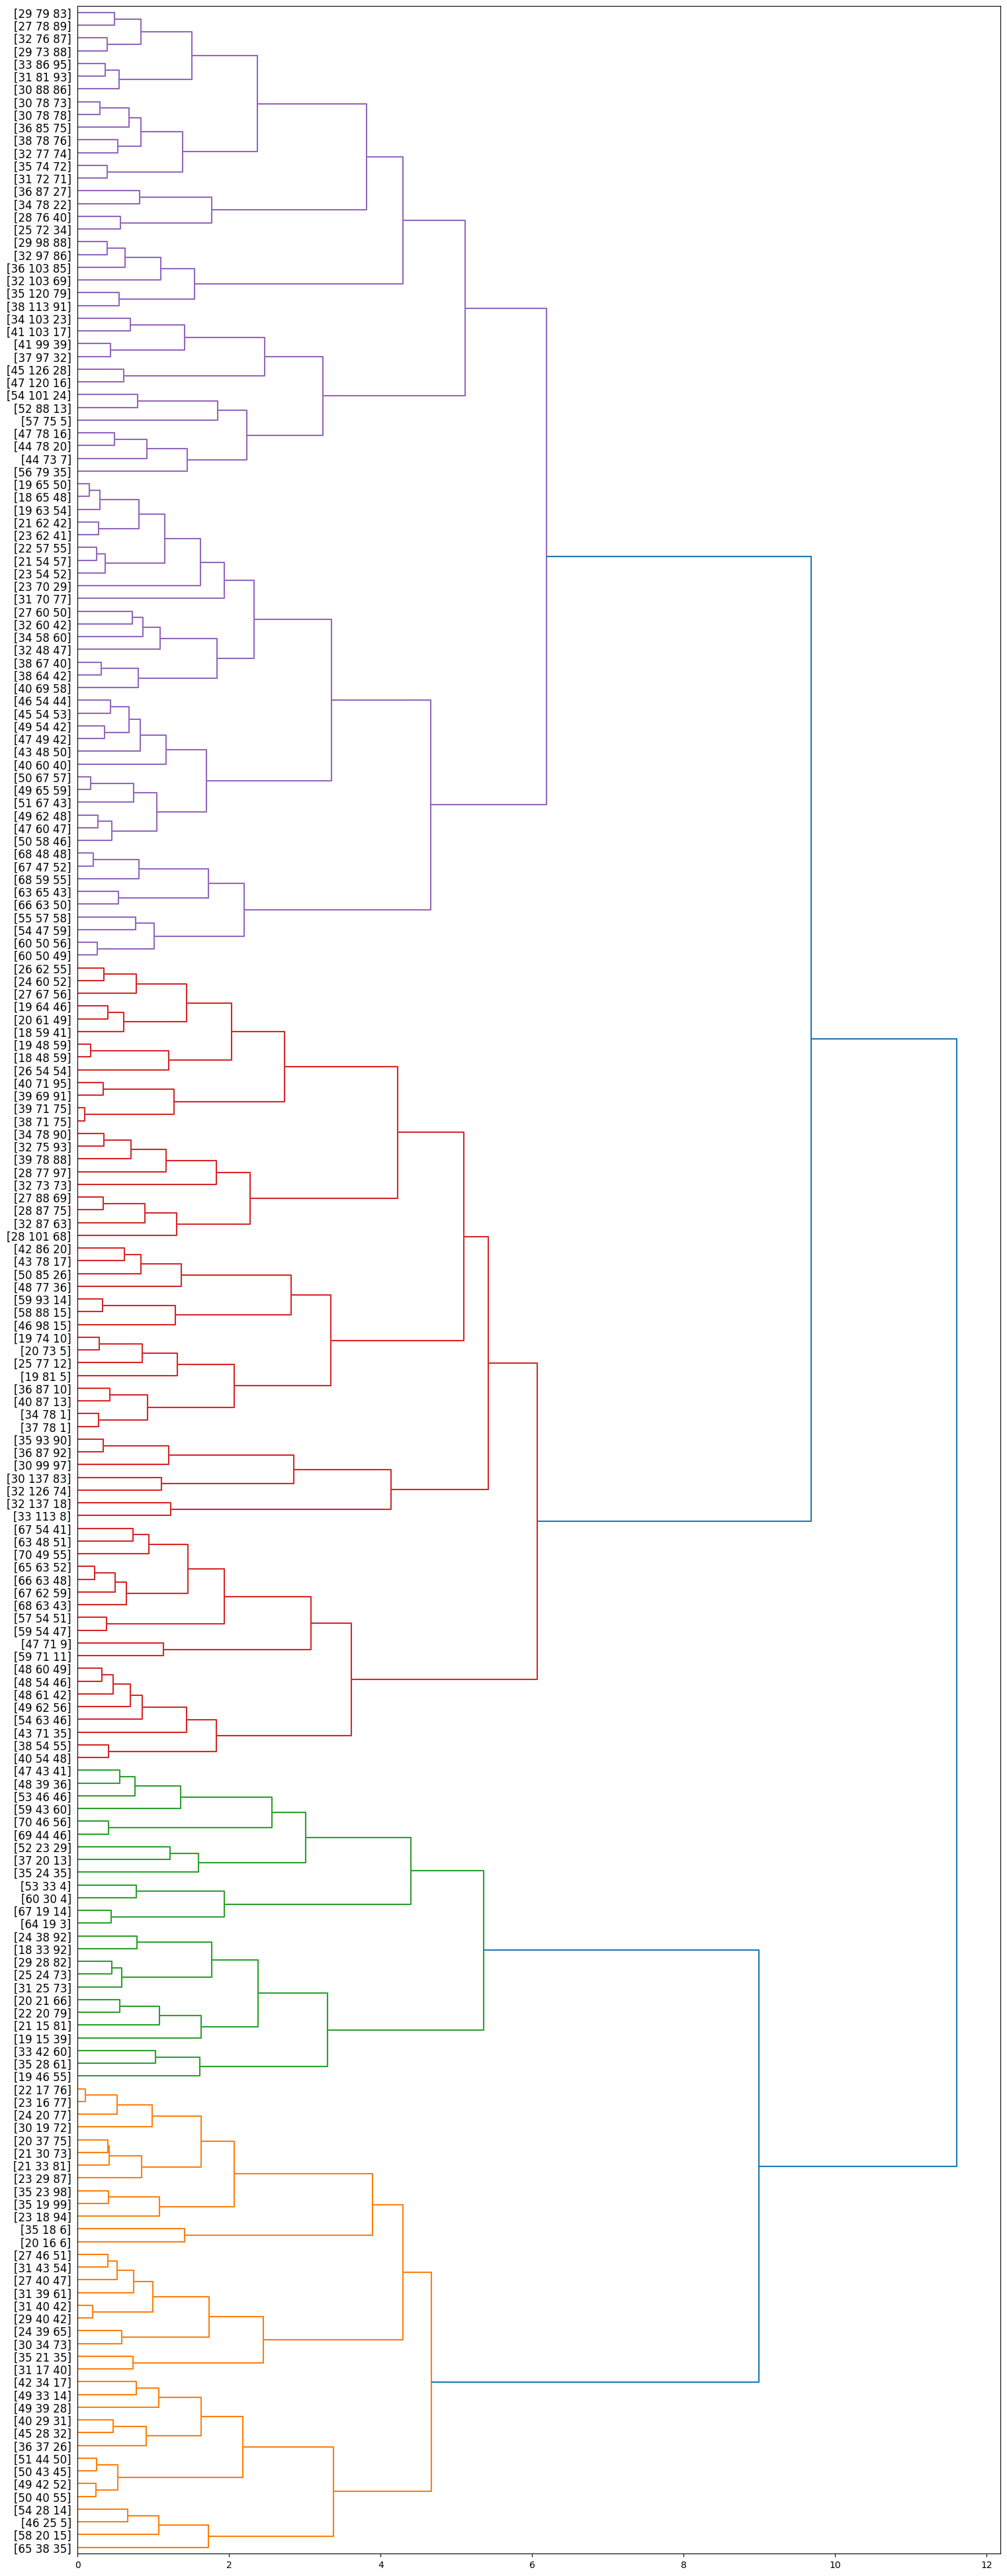

In [109]:
fig = pl.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (df['Age'][id], df['Annual Income (k$)'][id], df['Spending Score (1-100)'][id])
    
dendro = hierarchy.dendrogram(Z_using_dist_matrix,  leaf_label_func = llf, leaf_rotation = 0, leaf_font_size = 12, orientation = 'right')

In [131]:
agglom = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')
agglom.fit(dist_matrix)

agglom.labels_

C:\Users\B_Ameri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:544: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2,
       1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       2, 2], dtype=int64)

In [132]:
df['cluster_agglom'] = agglom.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clus_km,cluster_agglom
0,1,0,19,15,39,2,0
1,2,0,21,15,81,2,0
2,3,1,20,16,6,2,0
3,4,1,23,16,77,2,0
4,5,1,31,17,40,2,0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Spending Score (1-100)')

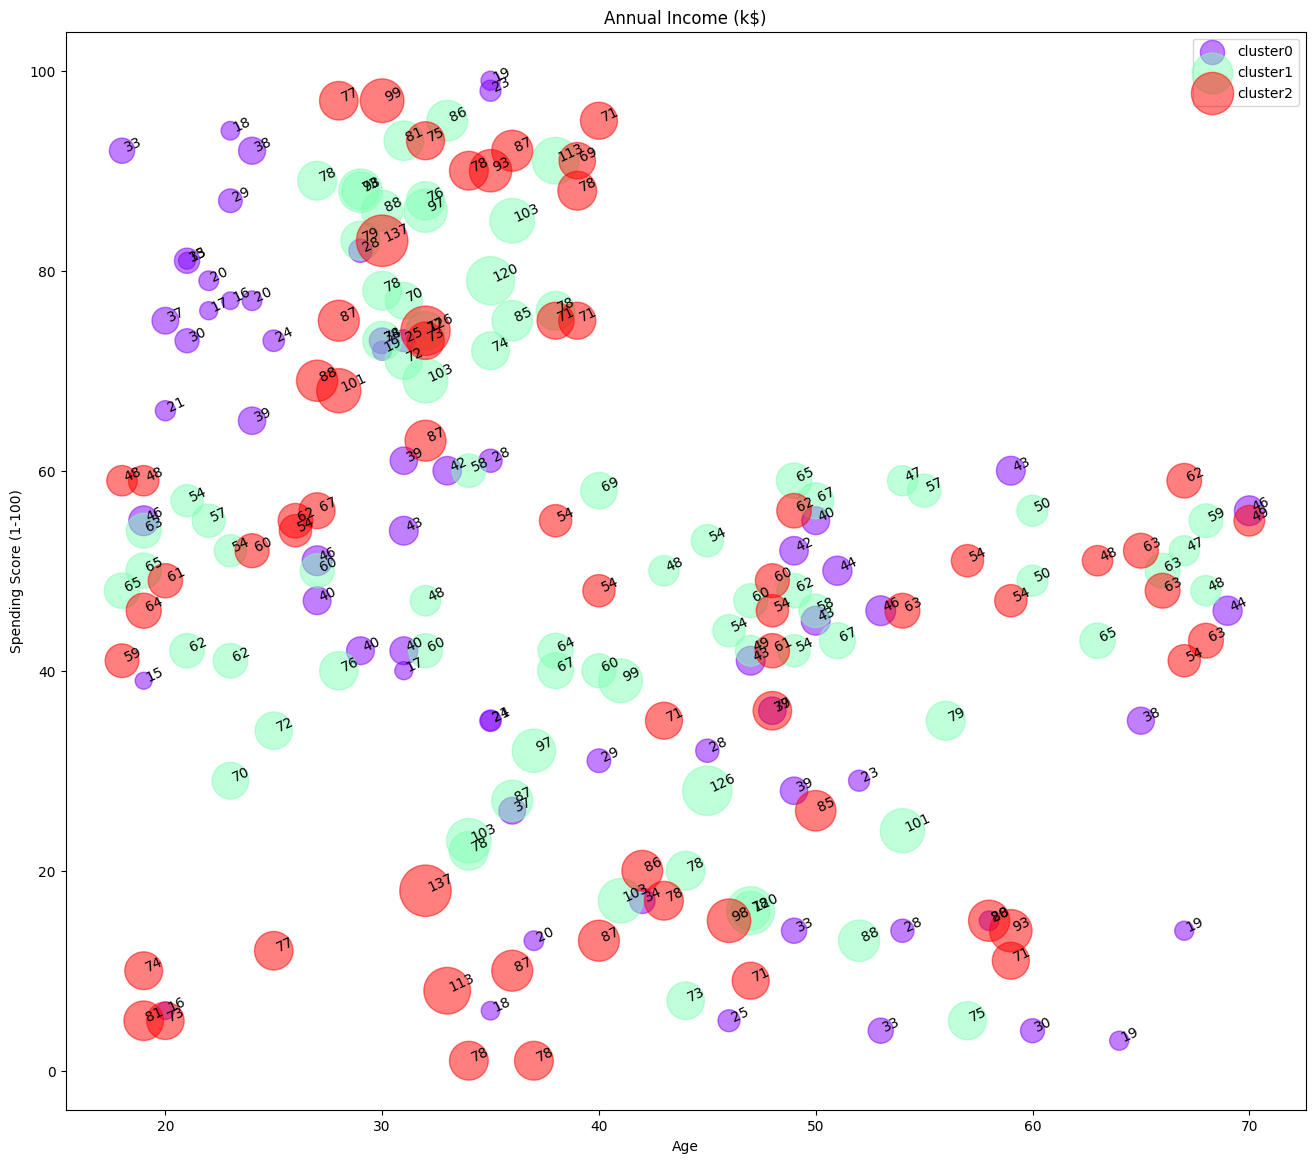

In [133]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))
plt.figure(figsize=(16,14))
for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster_agglom == label]
    for i in subset.index:
            plt.text(subset.Age[i], subset['Spending Score (1-100)'][i],subset['Annual Income (k$)'][i], rotation=25) 
    plt.scatter(subset.Age, subset['Spending Score (1-100)'], s= subset['Annual Income (k$)']*10, c=color, label='cluster'+str(label),alpha=0.5)
plt.legend()
plt.title('Annual Income (k$)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')